Data Preprocessing

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [31]:
df.drop(columns=['Unnamed: 0','key'],inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [32]:
df.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [34]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [35]:
df.shape

(200000, 7)

In [36]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [37]:
df.isnull().sum().sum()

2

In [38]:
df.dropna(how='any',inplace=True)

In [39]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Identifying Outlier

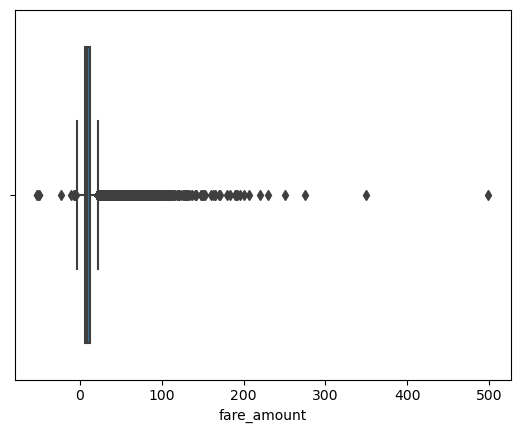

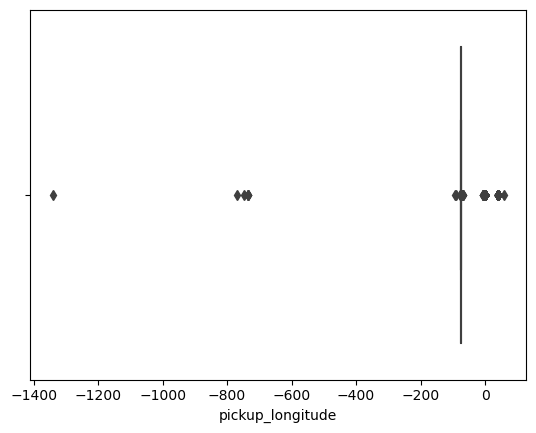

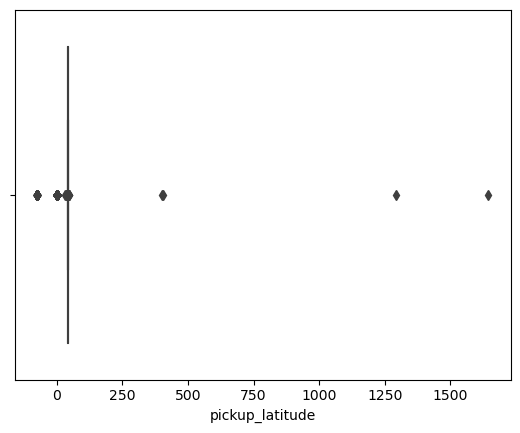

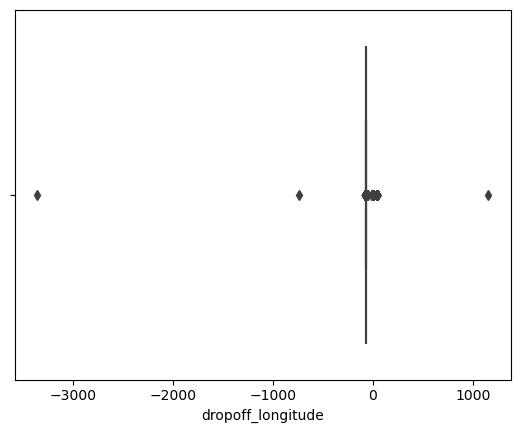

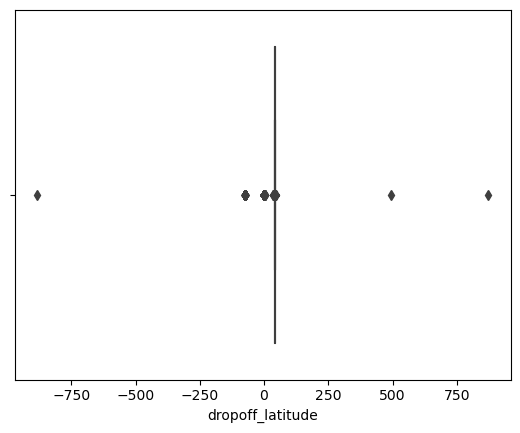

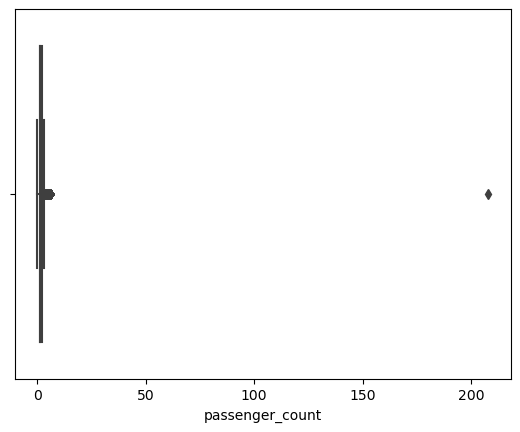

In [40]:
for col in df.select_dtypes(exclude='object'):
    plt.figure()
    sns.boxplot(data=df,x=col)

In [41]:
df=df[
    
    
    (df.pickup_latitude > -90) & (df.pickup_latitude <90)&
    (df.dropoff_latitude >-90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180)& (df.pickup_longitude <180)&
    (df.dropoff_longitude >-180) & (df.dropoff_longitude <180)&
    (df.fare_amount >0)& (df.passenger_count >0)  & (df.passenger_count <50)
    
]

In [42]:
from math import sin,cos,pi,sqrt

def distance(lat1,lat2,long1,long2):
    lat1,lat2,long1,long2=map(np.radians,[lat1,lat2,long1,long2])
    
    diff_lat=lat2-lat1
    diff_long=long2-long1
    
    km=2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2+ np.cos(lat1)*np.cos(lat2)* np.sin(diff_long/2.0)**2))
    
    return km

In [43]:
temp=distance(df['pickup_latitude'],df['dropoff_latitude'],df['pickup_longitude'],df['dropoff_longitude'])
temp.head()

0    1.683323
1    2.457590
2    5.036377
3    1.661683
4    4.475450
dtype: float64

In [44]:
df_new=df.copy()
df_new['distance']=temp;
df=df_new
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


<Axes: xlabel='distance'>

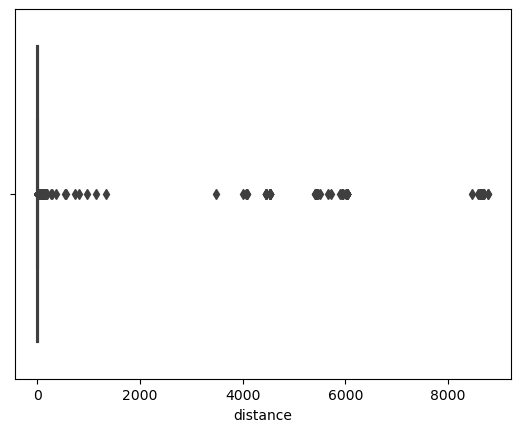

In [45]:
sns.boxplot(data=df,x='distance')

In [46]:
df=df[(df.distance > 0) & (df.distance <200)]

In [47]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

C:\Users\HP\AppData\Local\Temp\ipykernel_18272\2714565495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])


In [48]:
df.drop(columns=['pickup_datetime', 'pickup_longitude' ,'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18272\3546420093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['pickup_datetime', 'pickup_longitude' ,'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],inplace=True)


In [49]:
df.head()

,fare_amount,passenger_count,distance
0,7.5,1,1.683323
1,7.7,1,2.457590
2,12.9,1,5.036377
3,5.3,3,1.661683
4,16.0,5,4.475450


In [50]:
df.corr()

,fare_amount,passenger_count,distance
fare_amount,1.000000,0.011884,0.778667
passenger_count,0.011884,1.000000,0.005112
distance,0.778667,0.005112,1.000000


In [51]:
from sklearn.preprocessing import StandardScaler
x=df[['distance']].values
y=df['fare_amount'].values.reshape(-1,1)

In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=10)

std_x=StandardScaler()
x_train=std_x.fit_transform(x_train)
x_test=std_x.transform(x_test)

std_y=StandardScaler()
y_train=std_y.fit_transform(y_train)
y_test=std_y.transform(y_test)

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
def fit_predict(model):
    model.fit(x_train,y_train.ravel())
    y_pred=model.predict(x_test)
    
    RMSE=mean_squared_error(y_test,y_pred)
    R2= r2_score(y_test,y_pred)
    MAE=mean_absolute_error(y_test,y_pred)
    
    print("RMSE",RMSE)
    print("R2",R2)
    print("MAE",MAE)

In [54]:
from sklearn.linear_model import LinearRegression
fit_predict(LinearRegression())

RMSE 37.55014625669921
R2 0.6041167920841171
MAE 2.6841680693976695


In [ ]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor())